## Simulation of Multivariate Normal Distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
mean1 = torch.tensor([-0.5, -0.5])
cov1 = torch.tensor([[1, 0.25], [0.25, 1]])

mean2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

In [3]:
m = 1000 

In [4]:
dist1 = torch.distributions.MultivariateNormal(mean1, cov1)
X1 = dist1.sample((m,))

dist2 = torch.distributions.MultivariateNormal(mean2, cov2)
X2 = dist2.sample((m,))

In [5]:
X = torch.vstack((X1, X2))

In [6]:
X

tensor([[-1.7316, -0.4314],
        [-0.4753, -0.2130],
        [-0.6423, -0.5084],
        ...,
        [-0.1463,  1.9576],
        [ 0.9470,  1.2500],
        [ 0.5121,  1.1217]])

In [7]:
meanX = torch.mean(X, dim=0)
covX = torch.cov(X.T) 

print('meanX: ', meanX)
print('covX: ', covX)

meanX:  tensor([-0.0418,  0.0083])
covX:  tensor([[1.2600, 0.5053],
        [0.5053, 1.2217]])


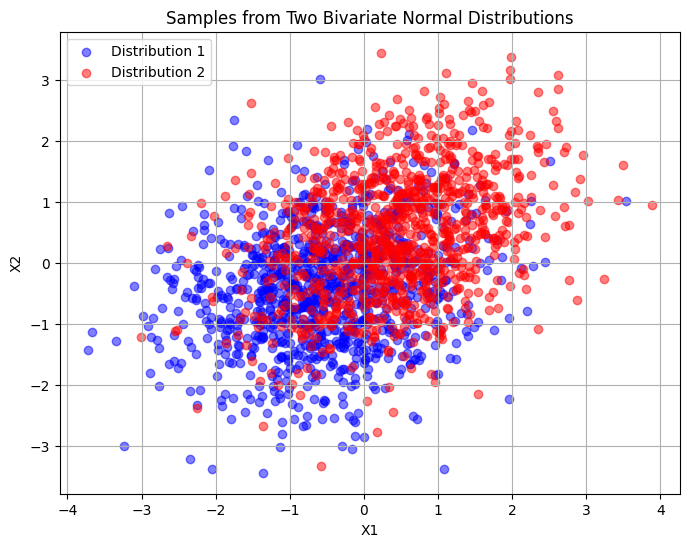

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0].numpy(), X1[:, 1].numpy(), color='blue', alpha=0.5, label='Distribution 1')
plt.scatter(X2[:, 0].numpy(), X2[:, 1].numpy(), color='red', alpha=0.5, label='Distribution 2')
plt.title("Samples from Two Bivariate Normal Distributions")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
print("Mean of the combined tensor X:")
print(meanX)

print("\nCovariance matrix of the combined tensor X:")
print(covX)

Mean of the combined tensor X:
tensor([-0.0418,  0.0083])

Covariance matrix of the combined tensor X:
tensor([[1.2600, 0.5053],
        [0.5053, 1.2217]])


## K-Means Clustering

In [12]:
# Function to initialize k random centroids (centers)
def initialize_centroids(X, k):
    indices = torch.randperm(X.shape[0])[:k]
    return X[indices]

In [23]:
# Distance between points and centroids
def compute_distances(X, centroids):
    return torch.cdist(X, centroids)

In [14]:
# To assign clusters
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return torch.argmin(distances, dim=1)

In [15]:
# To update centroids
def update_centroids(X, cluster_assignments, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[cluster_assignments == i]
        new_centroids.append(cluster_points.mean(dim=0))
    return torch.stack(new_centroids)

In [16]:
# K-means algorithm 
def kmeans(X, k, num_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    for i in range(num_iters):
        # Assign points to the nearest centroid
        cluster_assignments = assign_clusters(X, centroids)
        
        # Update centroids based on the mean of assigned points
        new_centroids = update_centroids(X, cluster_assignments, k)
        
        # Check for convergence (if centroids do not change)
        if torch.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignments

In [39]:
k = 4
centroids, clusters = kmeans(X, k)
print(f"Centroids", centers)
print(f"Clusters", clusters)

Centroids tensor([[-0.6210,  0.5011],
        [ 1.1652,  1.2782],
        [-1.2319, -1.1498],
        [ 0.5361, -0.5465]])
Clusters tensor([3, 1, 3,  ..., 2, 2, 2])


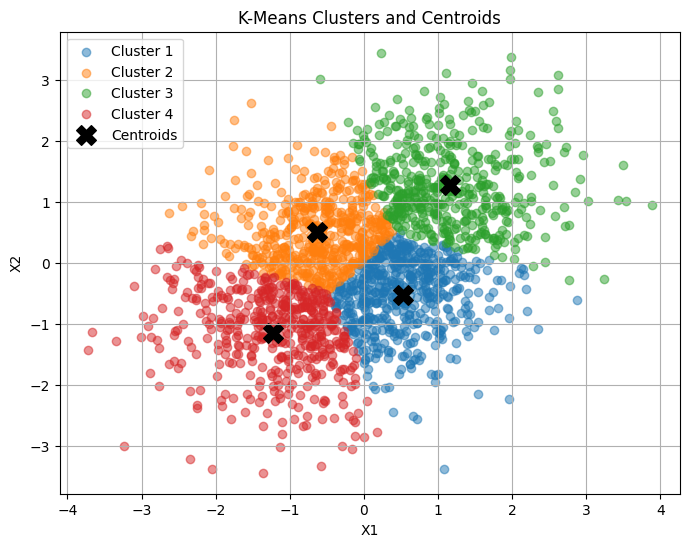

In [40]:
# Plotting the clusters and centroids
def plot_clusters(X, centroids, cluster_labels, k):
    plt.figure(figsize=(8, 6))
    
    # Plot each cluster
    for i in range(k):
        plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i+1}', alpha=0.5)
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
    
    plt.title("K-Means Clusters and Centroids")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the clusters and centroids
plot_clusters(X, centroids, clusters, k)

## Projection with Principal Component Analysis

In [26]:
from sklearn.decomposition import PCA

In [27]:
# Generate data
x = np.random.normal(0,1,(100, 4))
x[:, 2] = 3*x[:, 0] - 2*x[:, 1] + np.random.normal(0, 0.1, 100)
x[:, 3] = 1.5*x[:, 0] - 0.5*x[:, 1] + np.random.normal(0, 0.1, 100)

In [28]:
# Each feature will have xero mean
x = x - np.mean(x, axis=0)
x


array([[-5.02498104e-01, -1.30692859e+00,  9.93888929e-01,
        -2.11576171e-01],
       [-9.30068717e-01,  8.55075804e-01, -4.42803556e+00,
        -1.71912504e+00],
       [-2.40198192e-01,  7.69917568e-02, -8.92945914e-01,
        -4.24539699e-01],
       [-2.58188082e+00, -3.45298814e-01, -7.22169594e+00,
        -3.76489942e+00],
       [ 1.05844594e+00,  1.82787832e+00, -4.94043087e-01,
         8.13878901e-01],
       [ 3.48467318e+00, -4.04289377e-01,  1.12867053e+01,
         5.42453736e+00],
       [ 6.36609843e-01, -3.85952131e-01,  2.81506468e+00,
         1.19417914e+00],
       [-2.13331914e-01, -2.62718638e-01, -2.69926057e-01,
        -1.21222531e-01],
       [ 1.37897234e+00,  2.16105571e-01,  3.70122013e+00,
         1.81918815e+00],
       [-1.50529766e-01,  2.43205045e-01, -9.97971405e-01,
        -4.09551237e-01],
       [-1.21406228e+00, -1.49377886e+00, -7.56001471e-01,
        -1.07148364e+00],
       [ 1.23458313e+00,  1.38090658e+00,  8.76456021e-01,
      

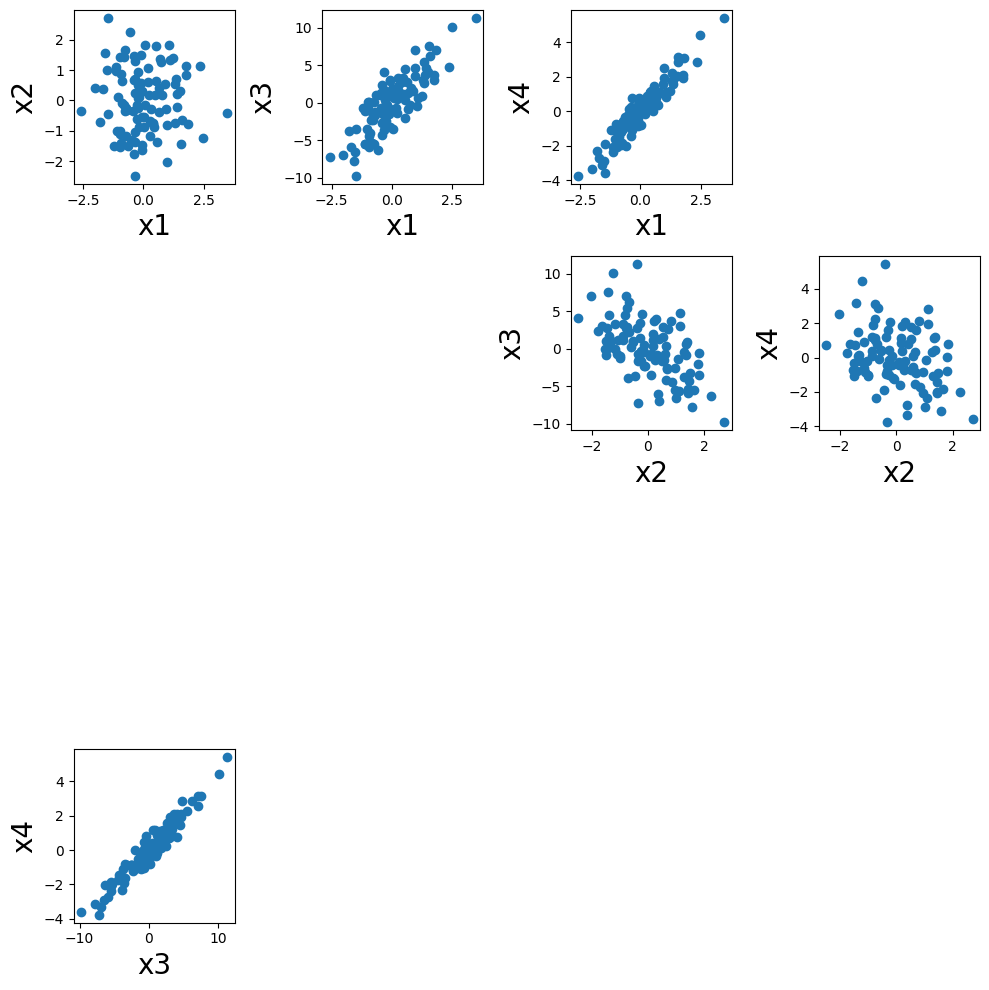

In [29]:
plt.figure(figsize=(10, 10))

for i in range(4):
    for j in range(4):
        if j>i:
            plt.subplot(4,4,i*4+j+i)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
            
plt.tight_layout()

In [30]:
# initialize
pca = PCA(n_components=4)

# fit
pca.fit(x)

PCA(n_components=4)

In [31]:
# get principal components
principal_comps_builtin = pca.components_.T


In [32]:
# print each principal component
for i, component in enumerate(pca.components_):
    print(f'principal_component {i}')
    print(component)
    print()

principal_component 0
[ 0.20710956 -0.13265065  0.89283398  0.37730216]

principal_component 1
[ 0.48566214  0.79551592 -0.13633327  0.33570814]

principal_component 2
[-0.22061976 -0.28952906 -0.35561853  0.86083408]

principal_component 3
[ 0.82010051 -0.51549118 -0.24040837 -0.06251259]



In [33]:
# to do it by hand

# compute covariance matrix

cov_matrix = sum([x[i].reshape(-1, 1) @ x[i].reshape(1, -1) for i in range(100)])/100
cov_matrix

array([[ 1.08175546e+00, -7.22468865e-03,  3.28050790e+00,
         1.62829692e+00],
       [-7.22468865e-03,  1.12746403e+00, -2.29237581e+00,
        -5.71904573e-01],
       [ 3.28050790e+00, -2.29237581e+00,  1.45285688e+01,
         6.06885460e+00],
       [ 1.62829692e+00, -5.71904573e-01,  6.06885460e+00,
         2.73877002e+00]])

In [34]:
# eigenvectors and eigenvalues of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)
eigvecs

EigResult(eigenvalues=array([1.81947617e+01, 1.27457020e+00, 5.14389843e-04, 6.71200249e-03]), eigenvectors=array([[ 0.20710956, -0.48566214, -0.82010051, -0.22061976],
       [-0.13265065, -0.79551592,  0.51549118, -0.28952906],
       [ 0.89283398,  0.13633327,  0.24040837, -0.35561853],
       [ 0.37730216, -0.33570814,  0.06251259,  0.86083408]]))

In [35]:
# sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]
ordering

array([0, 1, 3, 2])

In [36]:
# get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [37]:
# byhand
principal_comps_byhand

array([[ 0.20710956, -0.48566214, -0.22061976, -0.82010051],
       [-0.13265065, -0.79551592, -0.28952906,  0.51549118],
       [ 0.89283398,  0.13633327, -0.35561853,  0.24040837],
       [ 0.37730216, -0.33570814,  0.86083408,  0.06251259]])

In [38]:
# builtin
principal_comps_builtin

array([[ 0.20710956,  0.48566214, -0.22061976,  0.82010051],
       [-0.13265065,  0.79551592, -0.28952906, -0.51549118],
       [ 0.89283398, -0.13633327, -0.35561853, -0.24040837],
       [ 0.37730216,  0.33570814,  0.86083408, -0.06251259]])